<a href="https://colab.research.google.com/github/KrystynaKan/Computer_Vision_Practice/blob/main/CV_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT & DATA

This is an example of modifying .jpg file using Open CV

In [174]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [145]:
# I want to use a file from my own Google Drive:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [175]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/DataScience ComputerVision/1658742555407.jpg')

# MODIFYING DATA

Resize image:

In [176]:
img = cv2.resize(img, (462, 260), interpolation=cv2.INTER_LINEAR)

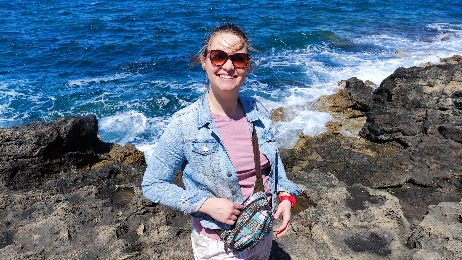

In [177]:
cv2_imshow(img)

In [178]:
img.shape

(260, 462, 3)

Split into parts blue, green, red:



In [180]:
b,g,r = cv2.split(img)

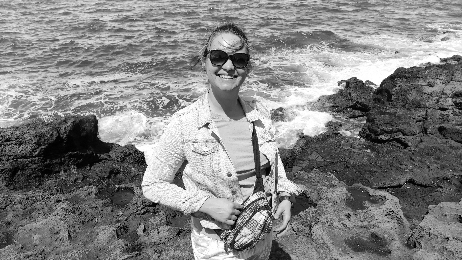

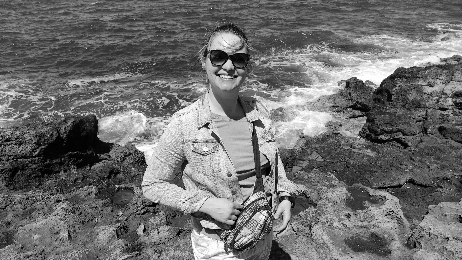

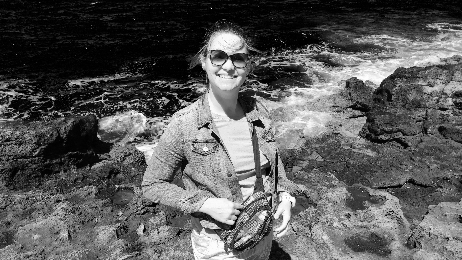

In [181]:
cv2_imshow(b)
cv2_imshow(g)
cv2_imshow(r)

# alternative method:
# cv2_imshow(img[:, :, 0])
# cv2_imshow(img[:, :, 1])
# cv2_imshow(img[:, :, 2])

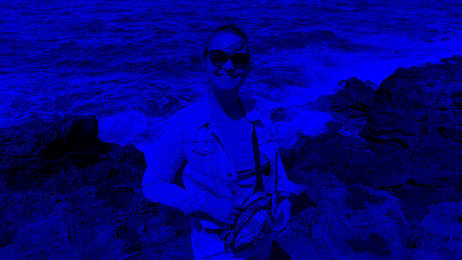

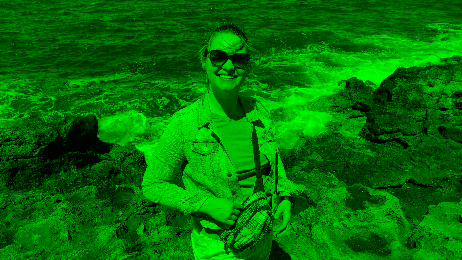

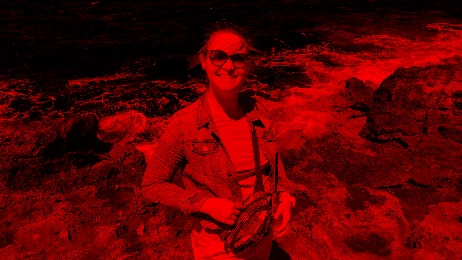

In [183]:
#blue
b = img.copy()
b[:, :, 1] = 0
b[:, :, 2] = 0

cv2_imshow(b)

#green
g = img.copy()
g[:, :, 0] = 0
g[:, :, 2] = 0

cv2_imshow(g)

#red
r = img.copy()
r[:, :, 0] = 0
r[:, :, 1] = 0

cv2_imshow(r)

Histogram shows number of pixels in 3 colors 

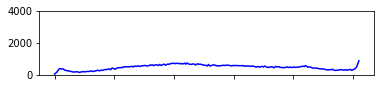

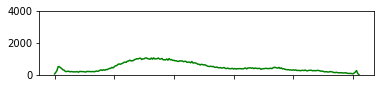

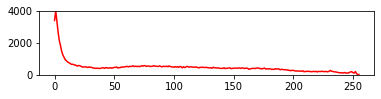

In [184]:
def show_histogram(image):
    ax1 = plt.subplot(311)
    plt.xlim([0, 256])
    plt.ylim([0, 4000])
    for i, col in enumerate(['b', 'g', 'r']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        ax1 = plt.subplot(3,1,i+1, sharey=ax1)
        plt.plot(hist, color = col)
        # 
        if i<2:     
            plt.setp(ax1.get_xticklabels(), visible=False)
            plt.show()

show_histogram(img)

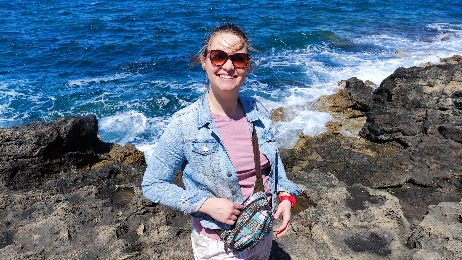

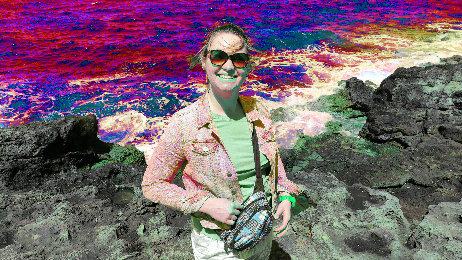

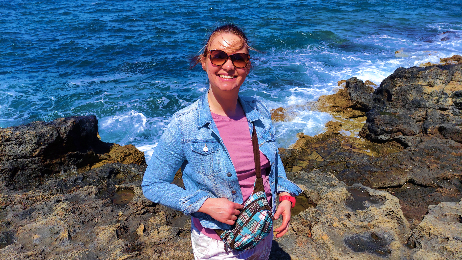

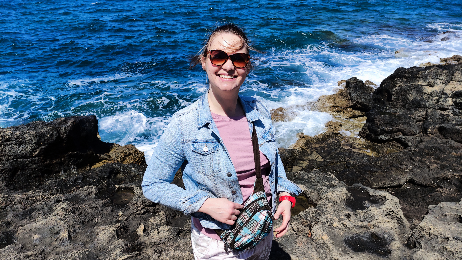

In [186]:
def show_hsv_equalized(image):
    new_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    H, S, V = cv2.split(new_image)
    eq_H = cv2.equalizeHist(H)
    eq_S = cv2.equalizeHist(S)
    eq_V = cv2.equalizeHist(V)
    eq_image_H = cv2.cvtColor(cv2.merge([eq_H, S, V]), cv2.COLOR_HSV2BGR)
    eq_image_S = cv2.cvtColor(cv2.merge([H, eq_S, V]), cv2.COLOR_HSV2BGR)
    eq_image_V = cv2.cvtColor(cv2.merge([H, S, eq_V]), cv2.COLOR_HSV2BGR)
    cv2_imshow(eq_image_H)
    cv2_imshow(eq_image_S)
    cv2_imshow(eq_image_V)


cv2_imshow(img)
show_hsv_equalized(img)